In [5]:
### Preamble ###
## Preamble ###
## Hack code to calculate out snow depth gradients over non ice surfaces
## Code for CBT technical report (snow chapter)
## Requires use of co-registered DEMs and an ice mask
## Brian Menounos 6 April, 2019

from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## enable zooming of plots in this notebook
#import mpld3
#mpld3.enable_notebook()
#from mpld3 import plugins

## enable latex symbols in graphs
plt.rcParams['text.latex.preamble']=[r"\usepackage{wasysym}"]


path = '/media/pelto/serac_backup/Lidar_DEMs/bare_earth_BC_hydro/zillmer/'
path_out = path


## this will be done for many sites to make a function call to extract
## data of interest 
## uses panda  
def make_snow_gradients(path, path_out, be_dem, snow_dem, msk):
    # open GeoTIFF as array
    be_dem   = gdal.Open(path + be_dem).ReadAsArray()
    snow_dem = gdal.Open(path + snow_dem).ReadAsArray()
    msk      = gdal.Open(path + msk).ReadAsArray() * 1.0
    
    be_dem[be_dem < 1.0] = np.nan
    
    msk[msk == 0.0] = 2.0
    msk[msk == 1.0] = np.nan

    print(np.shape(be_dem))
    print(np.shape(snow_dem))

    dh = (msk - 1.0) *(snow_dem - be_dem)

    dh[np.abs(dh) > 10] = np.nan
    dh[dh < 0] = np.nan
 
    #dh[c2018 < 1800] = np.nan
    
    plt.imshow(dh)
    plt.colorbar()
    plt.show()


    print('Average elevation change:', np.nanmean(dh), 'm')


    # convert 2-d elevation and SWE arrays to 1-D vectors using ravel function
    Zvec = np.ravel(be_dem)
    Depthvec = np.ravel(dh)

    bins = range(1400,3700,100)
    
    # create pandas dataframe for elevation and SWE
    df = pd.DataFrame({"Z":Zvec,"Depth":Depthvec})

    # classify the elevation data into 100 metre bins and add to the data frame 
    df['Zbins'] = pd.cut(df['Z'], bins, labels= np.arange(1450, 3650, 100))
    #if np.count_nonzero()
    
    data = df.groupby(by='Zbins')['Depth'].median()

    
    data = data.dropna()

    
    return data


(2242, 1922)
(2242, 1922)


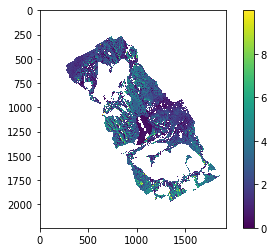

Average elevation change: 2.480180729079604 m


AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [4]:
## testing

c_2015 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif', 
                    #'nordic_winter_2015_5m.tif', 
                    '150419_nordic_ppp_bedem5_slave.tif',         
                    'nordic_all_glaciers_msk_2014_5m.tif')

c_2016 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif', 
                    #'nordic_winter_2016_5m.tif', 
                    '160417_nordic_ppp_bedem5_slave.tif', 
                    'nordic_all_glaciers_msk_2014_5m.tif')

c_2017 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif', 
                    #'nordic_winter_2017_5m.tif', 
                    '170521_Nordic_bedem_clip_und5m_slave.tif',
                    'nordic_all_glaciers_msk_2014_5m.tif')

c_2018 = make_snow_gradients(path, path_out, '140911_nordic_bedem5.tif', 
                    #'nordic_winter_2018_5m.tif', 
                    '180426_nordic_bedem5_slave.tif',
                    'nordic_all_glaciers_msk_2014_5m.tif')

# c_2015 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
#                     'conrad_2015_winter_5m.tif', 
#                     'conrad_2016_ice_msk_5m.tif')

# c_2016 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
#                     'conrad_2016_winter_5m.tif', 
#                     'conrad_2016_ice_msk_5m.tif')

# c_2017 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
#                     'conrad_2017_winter_5m.tif', 
#                     'conrad_2016_ice_msk_5m.tif')

# c_2018 = make_snow_gradients(path, path_out, 'conrad_bedem_master_5m.tif', 
#                     'conrad_2018_winter_5m.tif', 
#                     'conrad_2016_ice_msk_5m.tif')


In [ ]:
## make a few plots
## since function 'make_snow_gradients' returns pandas series with indexes 
## we have to extract values noted in calls to objects in plot values


plt.rcParams['figure.figsize'] = 5, 10
plt.plot(c_2015.get_values(), c_2015.index.get_values(),'-ro', label='2015')
plt.plot(c_2016.get_values(), c_2016.index.get_values(), '-g*', label='2016')
plt.plot(c_2017.get_values(), c_2017.index.get_values(), '-k.', label='2017')
plt.plot(c_2018.get_values(), c_2018.index.get_values(), '-b^', label='2018')
plt.yticks(np.arange(1450, 3650, 100))
plt.ylabel('Elevation [m asl]')
plt.xlabel('Snow depth [m]')
plt.tight_layout()
plt.legend()
plt.savefig(path_out + 'Nordic_snow_gradients_off_ice.pdf', resolution=600)
plt.show()

(2242, 1922)
(2242, 1922)


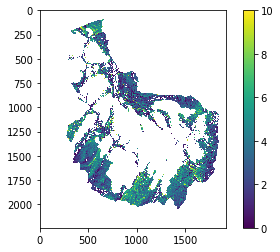

Average elevation change: 3.4476473 m
(2242, 1922)
(2242, 1922)


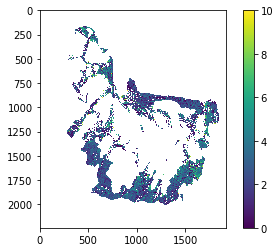

Average elevation change: 2.7735868 m
(2242, 1922)
(2242, 1922)


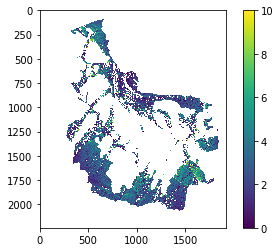

Average elevation change: 2.8949637 m
(2242, 1922)
(2242, 1922)


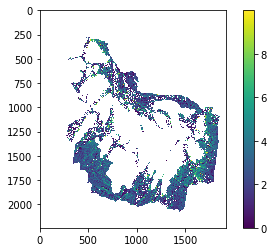

Average elevation change: 2.823852 m


In [6]:
#zillmer
c_2015 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '150419_zillmer_bedem5_slave.tif',         
                    'zillmer_all_glaciers_2014_5m.tif')

c_2016 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '160418_zillmer_bedem5_slave.tif', 
                    'zillmer_all_glaciers_2014_5m.tif')

c_2017 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '170521_zillmer_bedem5_slave.tif',
                    'zillmer_all_glaciers_2014_5m.tif')

c_2018 = make_snow_gradients(path, path_out, '160914_zillmer_bedem5.tif', 
                    '180429_zillmer_bedem5_slave.tif',
                    'zillmer_all_glaciers_2014_5m.tif')

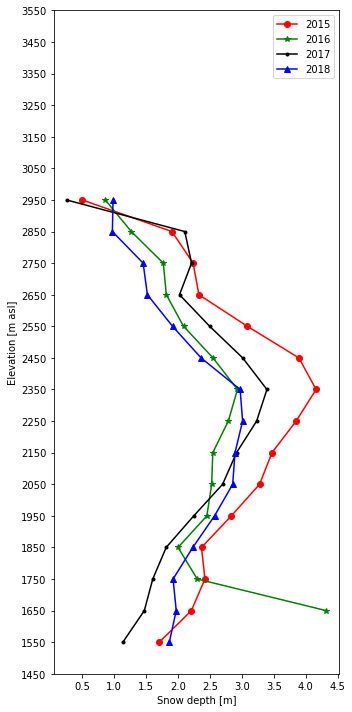

In [7]:
## make a few plots
## since function 'make_snow_gradients' returns pandas series with indexes 
## we have to extract values noted in calls to objects in plot values


plt.rcParams['figure.figsize'] = 5, 10
plt.plot(c_2015.get_values(), c_2015.index.get_values(),'-ro', label='2015')
plt.plot(c_2016.get_values(), c_2016.index.get_values(), '-g*', label='2016')
plt.plot(c_2017.get_values(), c_2017.index.get_values(), '-k.', label='2017')
plt.plot(c_2018.get_values(), c_2018.index.get_values(), '-b^', label='2018')
plt.yticks(np.arange(1450, 3650, 100))
plt.ylabel('Elevation [m asl]')
plt.xlabel('Snow depth [m]')
plt.tight_layout()
plt.legend()
plt.savefig(path_out + 'Zillmer_snow_gradients_off_ice.pdf', resolution=600)
plt.show()

In [204]:
## try kokanee
path = '/Volumes/Powermac_backup/lidar_cbt_analysis/kokanee/'
k_2018 = make_snow_gradients(path, path_out, '160913_Kokanee_bedem_5m.tif', 
                    '180426_kokanee_winter_5m.tif', 
                    'kokanee_2016_ice_msk_5m.tif')

(1602, 1442)
(8010, 7210)


ValueError: operands could not be broadcast together with shapes (8010,7210) (1602,1442) 

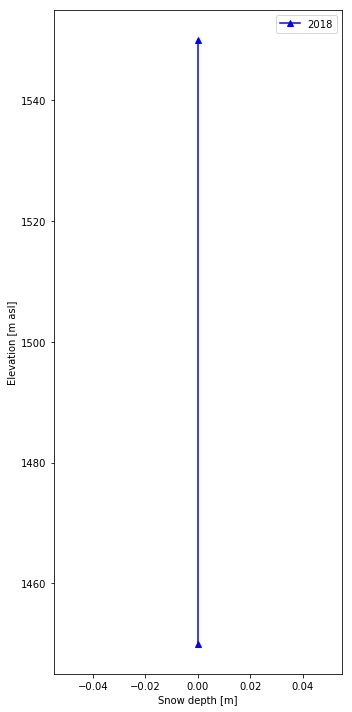

In [205]:
## make a few plots
plt.rcParams['figure.figsize'] = 5, 10
#plt.plot(c_2015.get_values(), c_2015.index.get_values(),'-ro', label='2015')
#plt.plot(c_2016.get_values(), c_2016.index.get_values(), '-g*', label='2016')
#plt.plot(c_2017.get_values(), c_2017.index.get_values(), '-k.', label='2017')
plt.plot(k_2018.get_values(), k_2018.index.get_values(), '-b^', label='2018')
plt.ylabel('Elevation [m asl]')
plt.xlabel('Snow depth [m]')
plt.tight_layout()
plt.legend()
plt.savefig('Kokanee_snow_gradients_off_ice.pdf', resolution=600)
plt.show()